## data ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch.utils.data as td

### original image ###

Original image shape is (192, 168)


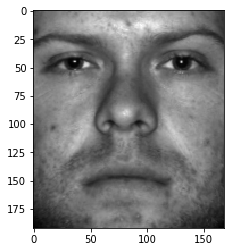

In [2]:
img = Image.open('data/CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm')
img = np.array(img)
print("Original image shape is", img.shape)
plt.imshow(img, cmap='gray')
plt.show()

### processed image loaded from ExtendedYaleFace dataset ###

Total number of images is 2414
Dimension of the batch data is torch.Size([4, 1, 32, 32])
Batch size is 4
Channel is 1
Image shape is resized to: torch.Size([32, 32])


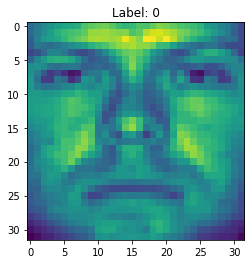

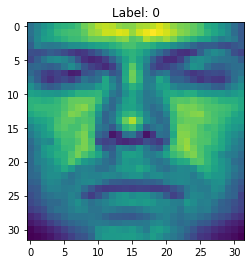

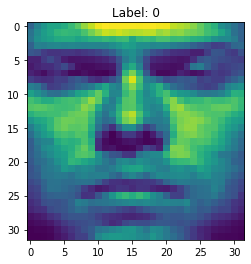

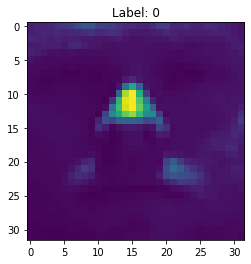

In [3]:
from dataset import ExtendedYaleFace

# dataset
yale_face = ExtendedYaleFace(root="data/CroppedYale", image_shape=[32, 32], flatten=False)
print("Total number of images is", yale_face.__len__())

# dataloader
dataloader = td.DataLoader(yale_face, batch_size=4, shuffle=False)

# visualize the first batch
for batch_idx, (image_batch, labels) in enumerate(dataloader):
    if batch_idx >= 1:
        break
    print("Dimension of the batch data is", image_batch.shape)
    print("Batch size is", image_batch.shape[0])
    print("Channel is", image_batch.shape[1])
    print("Image shape is resized to:", image_batch.shape[2:])
    for img_idx, img in enumerate(image_batch):
        plt.title("Label: %d" % labels[img_idx])
        plt.imshow(img.squeeze(0))
        plt.show()

## PCA ##

Dimension of the batch data is torch.Size([2414, 1, 1024])


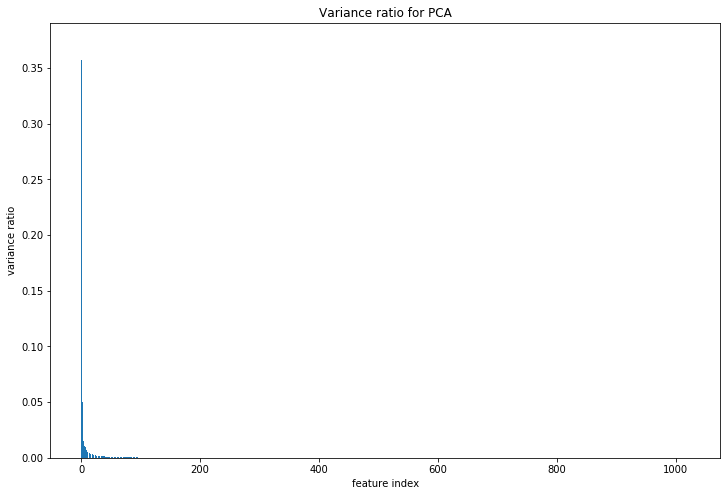

In [13]:
from sklearn.decomposition import PCA

# pca model
pca = PCA()

# dataset (flattened image)
yale_face = ExtendedYaleFace(root="data/CroppedYale", image_shape=[32, 32], flatten=True)

# dataloader
dataloader = td.DataLoader(yale_face, batch_size=yale_face.__len__(), shuffle=True)

for batch_idx, (X, Y) in enumerate(dataloader):
    print("Dimension of the batch data is", X.shape)
    X = X.squeeze().numpy()
    pca.fit(X)
    
    # plot variance ratio
    plt.figure(figsize=(12, 8))
    plt.title("Variance ratio for PCA")
    plt.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    plt.xlabel("feature index")
    plt.ylabel("variance ratio")
    plt.show()

### visualize first 10 eigenfaces ###

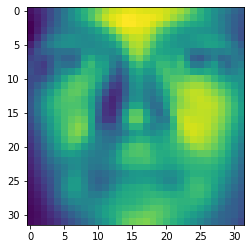

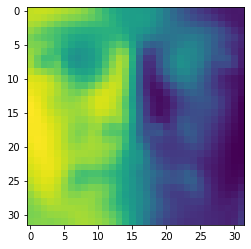

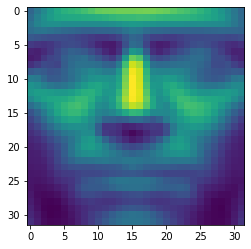

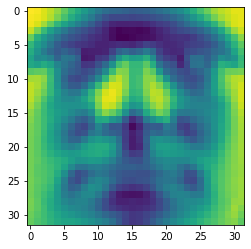

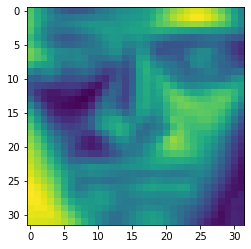

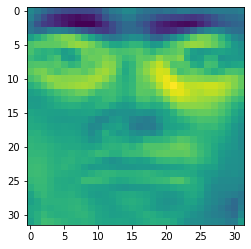

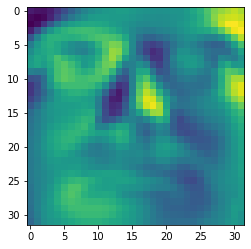

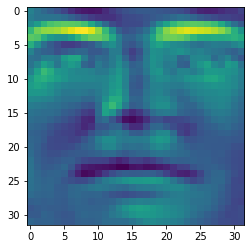

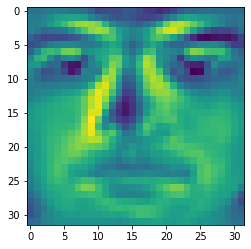

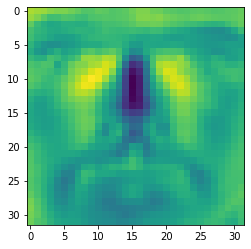

In [15]:
eigenfaces = pca.components_.reshape(-1, 32, 32)

for i in range(10):
    plt.imshow(eigenfaces[i])
    plt.show()